In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
actions = [
    'come',
    'away',
    'spin',
    'hello',
    'rock'
]

data = np.concatenate([
    np.load('dataset/seq_come_1745484539.npy'),
    np.load('dataset/seq_away_1627646273.npy'),
    np.load('dataset/seq_spin_1745484539.npy'),
    np.load('dataset/seq_hello_1745484539.npy'),
    np.load('dataset/seq_rock_1745484539.npy')
], axis=0)

data.shape

(3893, 30, 100)

In [3]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(3893, 30, 99)
(3893,)


In [4]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(3893, 5)

In [5]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(3503, 30, 99) (3503, 5)
(390, 30, 99) (390, 5)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

c:\Users\302-26\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        41,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,229 (172.77 KB)

 Trainable params: 44,229 (172.77 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/model2.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
103/110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4437 - loss: 13.0516
Epoch 1: val_acc improved from -inf to 0.87949, saving model to models/model2.h5


110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - acc: 0.4586 - loss: 12.6502 - val_acc: 0.8795 - val_loss: 1.1953 - learning_rate: 0.0010
Epoch 2/200
104/110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8257 - loss: 1.6276
Epoch 2: val_acc did not improve from 0.87949
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.8239 - loss: 1.6103 - val_acc: 0.8744 - val_loss: 1.4916 - learning_rate: 0.0010
Epoch 3/200
100/110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8017 - loss: 3.0712
Epoch 3: val_acc did not improve from 0.87949
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.7893 - loss: 3.2304 - val_acc: 0.6231 - val_loss: 2.6477 - learning_rate: 0.0010
Epoch 4/200
101/110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.7506 - loss: 1.8410
Epoch 4: val_acc did not improve from 0.87949
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.7529 - loss: 1.8113 - val_acc: 0.8077 - val_loss: 1.1522 - learning_rate: 0.0010
Epoch 5/200
102/110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8568 - loss: 1.0304
Epoch 5:

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.8847 - loss: 0.4322 - val_acc: 0.9000 - val_loss: 0.3666 - learning_rate: 0.0010
Epoch 7/200
105/110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8817 - loss: 0.5799
Epoch 7: val_acc did not improve from 0.90000
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.8812 - loss: 0.5813 - val_acc: 0.8615 - val_loss: 0.3862 - learning_rate: 0.0010
Epoch 8/200
104/110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9125 - loss: 0.3647
Epoch 8: val_acc improved from 0.90000 to 0.94615, saving model to models/model2.h5


110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9133 - loss: 0.3604 - val_acc: 0.9462 - val_loss: 0.1634 - learning_rate: 0.0010
Epoch 9/200
101/110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9365 - loss: 0.2370
Epoch 9: val_acc did not improve from 0.94615
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9340 - loss: 0.2497 - val_acc: 0.7821 - val_loss: 0.7428 - learning_rate: 0.0010
Epoch 10/200
109/110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8902 - loss: 0.4595
Epoch 10: val_acc improved from 0.94615 to 0.96410, saving model to models/model2.h5


110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.8909 - loss: 0.4565 - val_acc: 0.9641 - val_loss: 0.1302 - learning_rate: 0.0010
Epoch 11/200
101/110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9678 - loss: 0.1190
Epoch 11: val_acc improved from 0.96410 to 0.97179, saving model to models/model2.h5


110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9681 - loss: 0.1179 - val_acc: 0.9718 - val_loss: 0.1115 - learning_rate: 0.0010
Epoch 12/200
101/110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9700 - loss: 0.1146
Epoch 12: val_acc did not improve from 0.97179
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9702 - loss: 0.1143 - val_acc: 0.9692 - val_loss: 0.1387 - learning_rate: 0.0010
Epoch 13/200
103/110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9767 - loss: 0.1440
Epoch 13: val_acc did not improve from 0.97179
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9770 - loss: 0.1427 - val_acc: 0.9718 - val_loss: 0.0831 - learning_rate: 0.0010
Epoch 14/200
107/110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9828 - loss: 0.0691
Epoch 14: val_acc improved from 0.97179 to 0.98205, saving model to models/model2.h5


110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9829 - loss: 0.0686 - val_acc: 0.9821 - val_loss: 0.0565 - learning_rate: 0.0010
Epoch 15/200
109/110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9887 - loss: 0.0425
Epoch 15: val_acc improved from 0.98205 to 0.98462, saving model to models/model2.h5


110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9887 - loss: 0.0425 - val_acc: 0.9846 - val_loss: 0.0448 - learning_rate: 0.0010
Epoch 16/200
106/110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9941 - loss: 0.0333
Epoch 16: val_acc improved from 0.98462 to 0.98718, saving model to models/model2.h5


110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9941 - loss: 0.0333 - val_acc: 0.9872 - val_loss: 0.0510 - learning_rate: 0.0010
Epoch 17/200
101/110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9979 - loss: 0.0214
Epoch 17: val_acc improved from 0.98718 to 0.98974, saving model to models/model2.h5


110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9978 - loss: 0.0216 - val_acc: 0.9897 - val_loss: 0.0444 - learning_rate: 0.0010
Epoch 18/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9962 - loss: 0.0176
Epoch 18: val_acc improved from 0.98974 to 0.99231, saving model to models/model2.h5


110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9962 - loss: 0.0176 - val_acc: 0.9923 - val_loss: 0.0250 - learning_rate: 0.0010
Epoch 19/200
102/110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9980 - loss: 0.0142
Epoch 19: val_acc improved from 0.99231 to 0.99487, saving model to models/model2.h5


110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9981 - loss: 0.0139 - val_acc: 0.9949 - val_loss: 0.0186 - learning_rate: 0.0010
Epoch 20/200
106/110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9998 - loss: 0.0074
Epoch 20: val_acc improved from 0.99487 to 1.00000, saving model to models/model2.h5


110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9997 - loss: 0.0074 - val_acc: 1.0000 - val_loss: 0.0096 - learning_rate: 0.0010
Epoch 21/200
109/110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9995 - loss: 0.0067
Epoch 21: val_acc did not improve from 1.00000
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9995 - loss: 0.0067 - val_acc: 0.9974 - val_loss: 0.0083 - learning_rate: 0.0010
Epoch 22/200
109/110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 1.0000 - loss: 0.0041
Epoch 22: val_acc did not improve from 1.00000
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 1.0000 - loss: 0.0041 - val_acc: 1.0000 - val_loss: 0.0055 - learning_rate: 0.0010
Epoch 23/200
106/110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9996 - loss: 0.0046
Epoch 23: val_acc did not improve from 1.00000
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9996 - loss: 0.0047 - val_acc: 1.0000 - val_loss: 0.0066 - learning_rate: 0.0010
Epoch 24/200
104/110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 1.0000 - loss: 0.0046
Epo

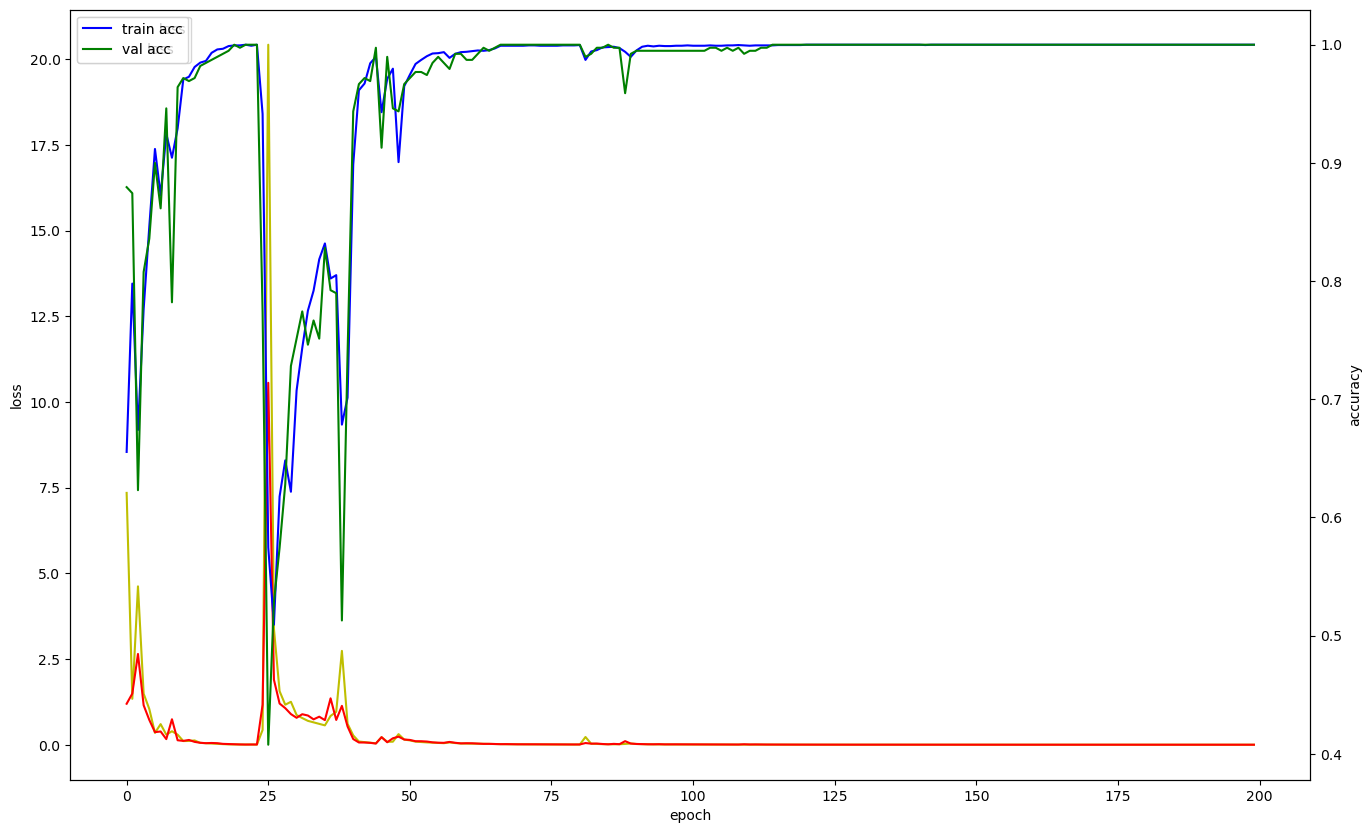

In [8]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [9]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model2.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[[296,   0],
        [  0,  94]],

       [[362,   0],
        [  0,  28]],

       [[287,   0],
        [  0, 103]],

       [[306,   0],
        [  0,  84]],

       [[309,   0],
        [  0,  81]]], dtype=int64)

In [10]:
import numpy as np
print("정답값 분포:", np.unique(np.argmax(y_val, axis=1), return_counts=True))
print("예측값 분포:", np.unique(np.argmax(y_pred, axis=1), return_counts=True))


정답값 분포: (array([0, 1, 2, 3, 4], dtype=int64), array([ 94,  28, 103,  84,  81], dtype=int64))
예측값 분포: (array([0, 1, 2, 3, 4], dtype=int64), array([ 94,  28, 103,  84,  81], dtype=int64))


In [11]:
from collections import Counter
print("Train:", Counter(np.argmax(y_train, axis=1)))
print("Val  :", Counter(np.argmax(y_val, axis=1)))

Train: Counter({4: 792, 0: 779, 3: 774, 2: 762, 1: 396})
Val  : Counter({2: 103, 0: 94, 3: 84, 4: 81, 1: 28})


In [12]:
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{0.0: 14012, 1.0: 3503}
